In [ ]:
import pandas as pd
import numpy as np
import re
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import shap
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from tqdm import tqdm

# Load and preprocess your data
df = pd.read_csv('shape.csv', encoding='latin1')

# Preprocessing function
def clean_text(text):
    text = BeautifulSoup(text, "lxml").text  # Remove HTML tags
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

df['Base_Reviews'] = df['Base_Reviews'].astype(str).apply(clean_text)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Base_Reviews'], df['category'], test_size=0.2, random_state=123)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 1))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train the MLP model with adjusted parameters
mlp_model = MLPClassifier(random_state=1, max_iter=300, learning_rate_init=0.005)
mlp_model.fit(X_train_tfidf, y_train)

# Check for convergence
if mlp_model.n_iter_ == mlp_model.max_iter:
    print("Warning: The model may not have converged. Consider increasing max_iter or adjusting other parameters.")


# Create SHAP explainer for the class and compute SHAP values
class_name = 'Compatibility and Device Issues'
class_indices = np.where(y_test == class_name)[0]

# Summarize the background data
X_train_summary = shap.sample(X_train_tfidf, 300)  # Reduced background samples
explainer = shap.KernelExplainer(mlp_model.predict_proba, X_train_summary)
shap_values = explainer.shap_values(X_test_tfidf[class_indices], nsamples='auto')  # Auto number of samples

# Get the top impacting words/features for the class
class_index = np.where(mlp_model.classes_ == class_name)[0][0]
shap_values_class = shap_values[class_index]
feature_names = vectorizer.get_feature_names_out()
top_words = np.argsort(np.abs(shap_values_class).mean(0))[-10:]
top_words_features = [feature_names[idx] for idx in top_words]

print(f"Class: {class_name}")
print(f"Top impacting words/features: {top_words_features}")

# Plot the summary plot for the class to visualize feature importance
shap.summary_plot(shap_values_class, X_test_tfidf[class_indices], feature_names=feature_names)

# Add the SHAP value and impact text
text = "SHAP value of Compatibility and Device Issues class | Impact on model output"
plt.text(0.5, -0.2, text, ha="center", fontsize=10, transform=plt.gca().transAxes)

# Save the plot as a PNG file
plt.savefig("Compatibility and Device Issues.png", dpi=300, bbox_inches="tight")

# Display the plot
plt.show()


The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
Using 300 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/59 [00:00<?, ?it/s]

The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
Using 441 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/20 [00:00<?, ?it/s]

Class: Compatibility and Device Issues
Top impacting words/features: ['google', 'gives', 'works', 'deleted', 'ios', 'operating', 'iphone', 'devices', 'device', 'compatible']


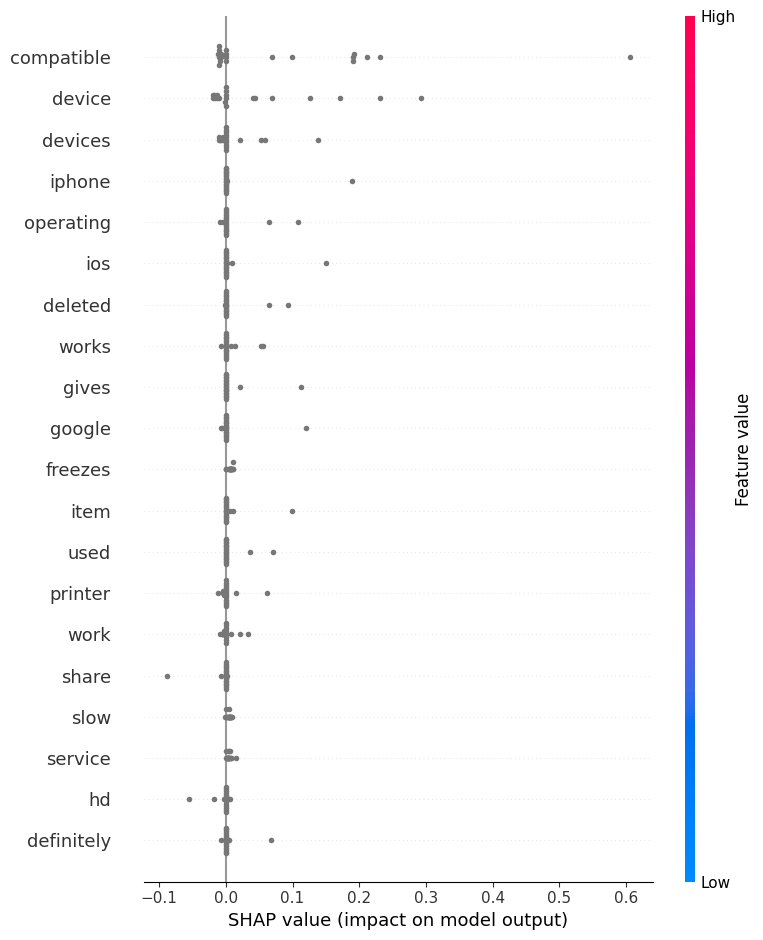

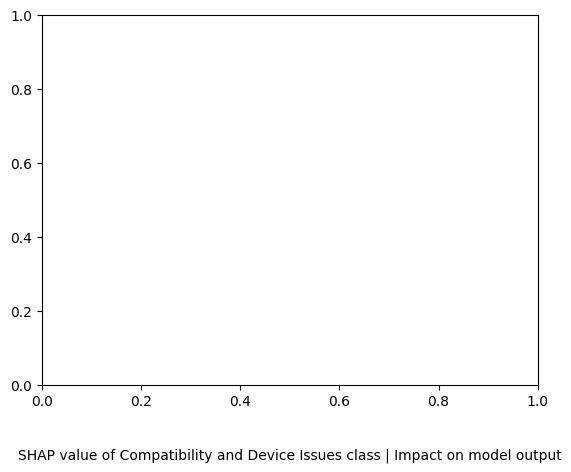

In [6]:
import pandas as pd
import numpy as np
import re
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import shap
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Load and preprocess your data
df = pd.read_csv('shape.csv', encoding='latin1')

# Preprocessing function
def clean_text(text):
    text = BeautifulSoup(text, "lxml").text
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

df['Base_Reviews'] = df['Base_Reviews'].astype(str).apply(clean_text)

# Step 2: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Base_Reviews'], df['category'], test_size=0.2, random_state=123)

# Step 3: Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 1))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 4: Train the MLP model
mlp_model = MLPClassifier(random_state=1, max_iter=300)
mlp_model.fit(X_train_tfidf, y_train)

# Step 5: Create SHAP explainer for the attacking class and compute SHAP values
class_name = 'Compatibility and Device Issues'
# Specify the class name
class_indices = np.where(y_test == class_name)[0]
explainer = shap.KernelExplainer(mlp_model.predict_proba, X_train_tfidf)  # Use sparse matrix
shap_values = explainer.shap_values(X_test_tfidf[class_indices])  # Use sparse matrix

# Step 6: Get the top impacting words/features for the attacking class
class_index = np.where(mlp_model.classes_ == class_name)[0][0]
shap_values_class = shap_values[class_index]
feature_names = vectorizer.get_feature_names_out()  # Get the feature names
top_words = np.argsort(np.abs(shap_values_class).mean(0))[-10:]  # Get the top 10 words/features
top_words_features = [feature_names[idx] for idx in top_words]

print(f"Class: {class_name}")
print(f"Top impacting words/features: {top_words_features}")

# Step 7: Plot the summary plot for the attacking class to visualize feature importance
shap.summary_plot(shap_values_class, X_test_tfidf[class_indices], feature_names=feature_names)

###### new code for bottom of the fig ####

import matplotlib.pyplot as plt

# # Step 7: Plot the summary plot for the supporting class to visualize feature importance
# shap.summary_plot(shap_values_class, X_test_tfidf[class_indices], feature_names=feature_names)

# Add the SHAP value and impact text
text = "SHAP value of Compatibility and Device Issues class | Impact on model output"
plt.text(0.5, -0.2, text, ha="center", fontsize=10, transform=plt.gca().transAxes)

# Save the plot as a PNG file
plt.savefig("Compatibility and Device Issues.png", dpi=300, bbox_inches="tight")

# Display the plot
plt.show()



Using 441 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/23 [00:00<?, ?it/s]

Class: Functionality and Features
Top impacting words/features: ['simple', 'functional', 'functionality', 'features', 'need', 'feature', 'function', 'featured', 'useful', 'missing']


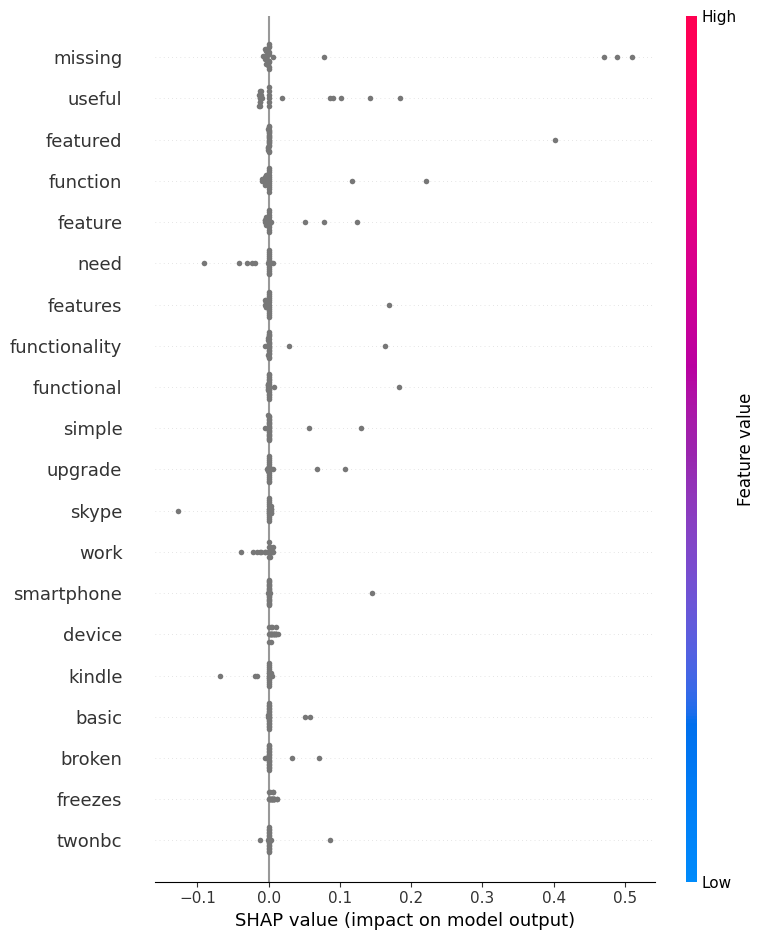

In [10]:
# Step 5: Create SHAP explainer for the attacking class and compute SHAP values
class_name = 'Functionality and Feature'  # Specify the class name
class_indices = np.where(y_test == class_name)[0]
explainer = shap.KernelExplainer(mlp_model.predict_proba, X_train_tfidf)  # Use sparse matrix
shap_values = explainer.shap_values(X_test_tfidf[class_indices])  # Use sparse matrix

# Step 6: Get the top impacting words/features for the attacking class
class_index = np.where(mlp_model.classes_ == class_name)[0][0]
shap_values_class = shap_values[class_index]
feature_names = vectorizer.get_feature_names_out()  # Get the feature names
top_words = np.argsort(np.abs(shap_values_class).mean(0))[-10:]  # Get the top 10 words/features
top_words_features = [feature_names[idx] for idx in top_words]

print(f"Class: {class_name}")
print(f"Top impacting words/features: {top_words_features}")

# Step 7: Plot the summary plot for the attacking class to visualize feature importance
shap.summary_plot(shap_values_class, X_test_tfidf[class_indices], feature_names=feature_names)

Using 441 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/7 [00:00<?, ?it/s]

Class: User Interface and UX
Top impacting words/features: ['espn', 'support', 'ui', 'hours', 'guide', 'canceled', 'hulu', 'user', 'interface', 'confusing']


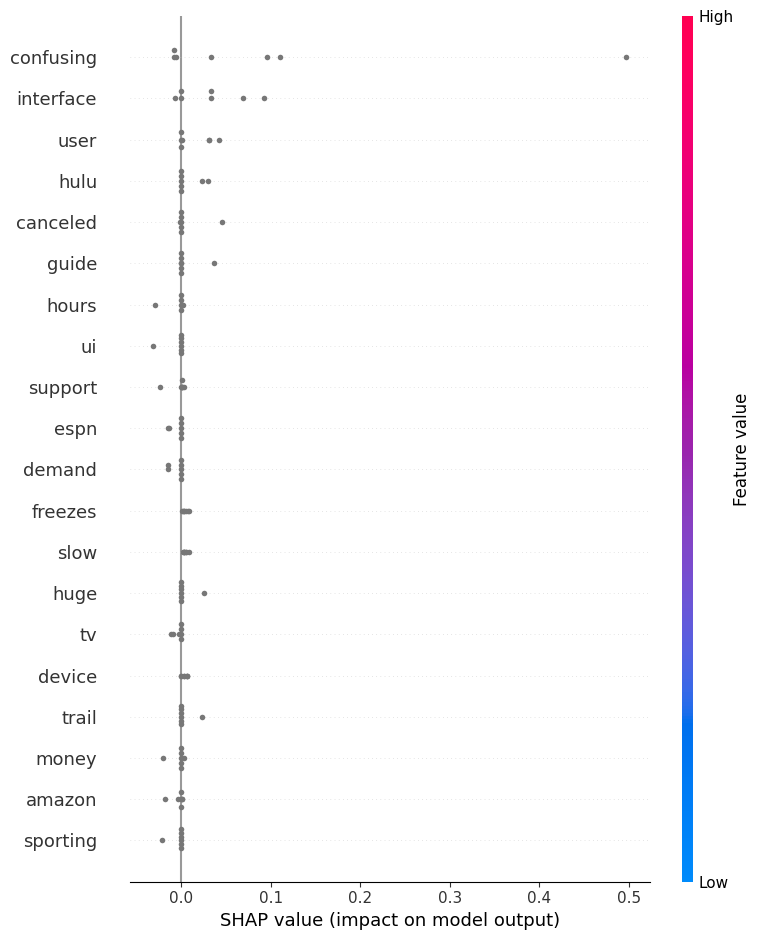

In [9]:
# Step 5: Create SHAP explainer for the attacking class and compute SHAP values
class_name = 'User Interface and UX'  # Specify the class name
class_indices = np.where(y_test == class_name)[0]
explainer = shap.KernelExplainer(mlp_model.predict_proba, X_train_tfidf)  # Use sparse matrix
shap_values = explainer.shap_values(X_test_tfidf[class_indices])  # Use sparse matrix

# Step 6: Get the top impacting words/features for the attacking class
class_index = np.where(mlp_model.classes_ == class_name)[0][0]
shap_values_class = shap_values[class_index]
feature_names = vectorizer.get_feature_names_out()  # Get the feature names
top_words = np.argsort(np.abs(shap_values_class).mean(0))[-10:]  # Get the top 10 words/features
top_words_features = [feature_names[idx] for idx in top_words]

print(f"Class: {class_name}")
print(f"Top impacting words/features: {top_words_features}")

# Step 7: Plot the summary plot for the attacking class to visualize feature importance
shap.summary_plot(shap_values_class, X_test_tfidf[class_indices], feature_names=feature_names)

Using 441 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/33 [00:00<?, ?it/s]

Class: Performance and Stability
Top impacting words/features: ['watch', 'freeze', 'lags', 'skype', 'slow', 'crashed', 'crash', 'lag', 'freezes', 'crashes']


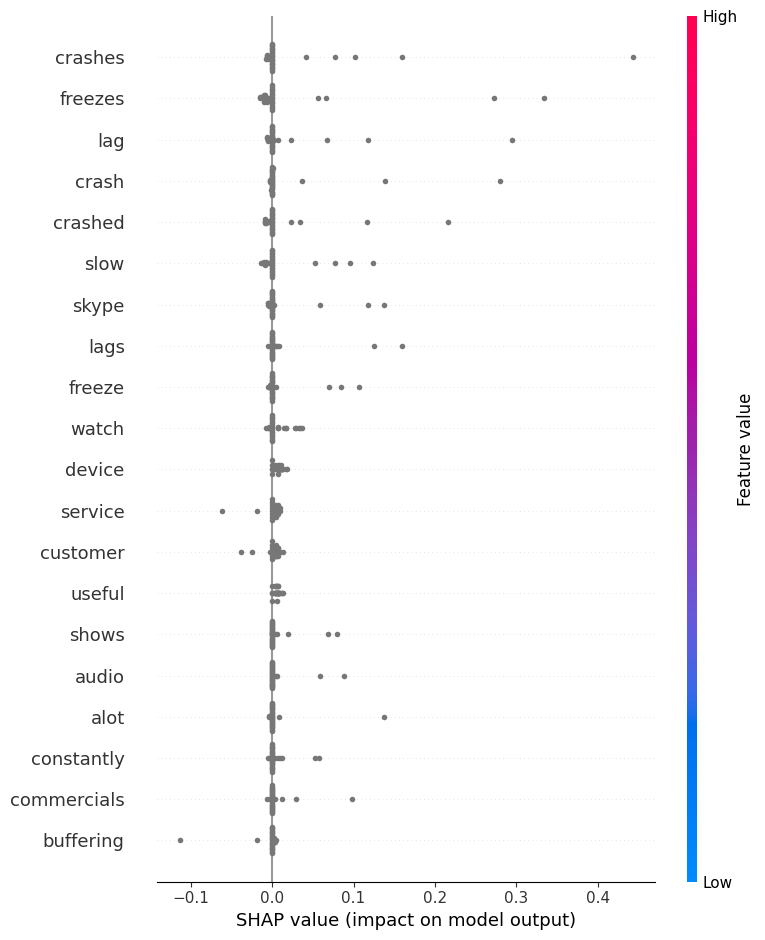

In [12]:
# Step 5: Create SHAP explainer for the attacking class and compute SHAP values
class_name = 'Performance and Stability'  # Specify the class name
class_indices = np.where(y_test == class_name)[0]
explainer = shap.KernelExplainer(mlp_model.predict_proba, X_train_tfidf)  # Use sparse matrix
shap_values = explainer.shap_values(X_test_tfidf[class_indices])  # Use sparse matrix

# Step 6: Get the top impacting words/features for the attacking class
class_index = np.where(mlp_model.classes_ == class_name)[0][0]
shap_values_class = shap_values[class_index]
feature_names = vectorizer.get_feature_names_out()  # Get the feature names
top_words = np.argsort(np.abs(shap_values_class).mean(0))[-10:]  # Get the top 10 words/features
top_words_features = [feature_names[idx] for idx in top_words]

print(f"Class: {class_name}")
print(f"Top impacting words/features: {top_words_features}")

# Step 7: Plot the summary plot for the attacking class to visualize feature importance
shap.summary_plot(shap_values_class, X_test_tfidf[class_indices], feature_names=feature_names)

  0%|          | 0/19 [00:00<?, ?it/s]

Class: Security and Privacy Concerns
Top impacting words/features: ['great', 'kindle', 'account', 'privacy', 'security', 'got', 'order', 'did', 'added', 'hacked']


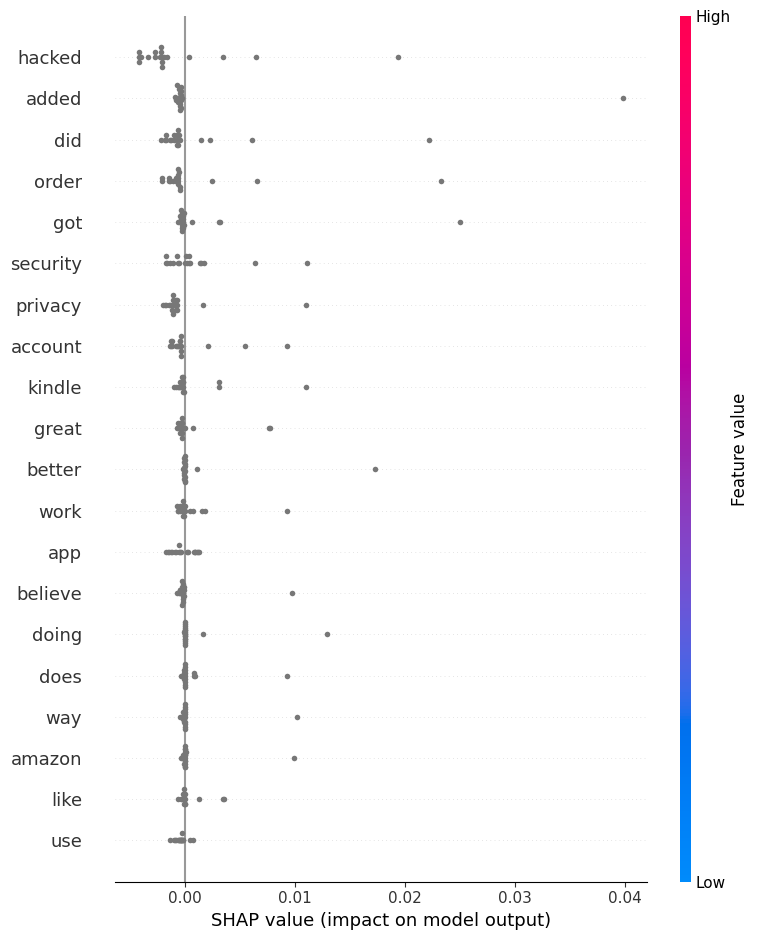

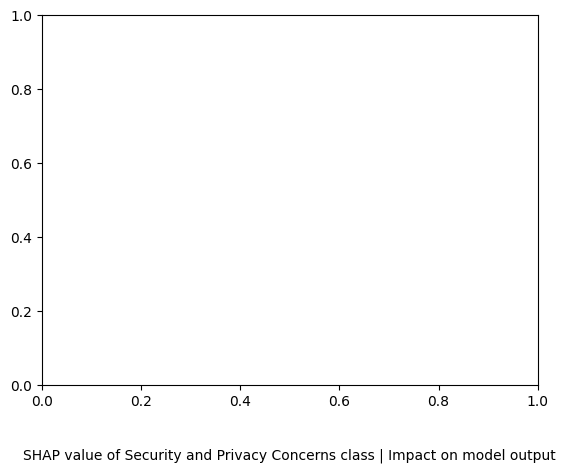

In [4]:
import pandas as pd
import numpy as np
import re
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import shap
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Load and preprocess your data
df = pd.read_csv('shape.csv', encoding='latin1')

# Preprocessing function
def clean_text(text):
    text = BeautifulSoup(text, "lxml").text
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

df['Base_Reviews'] = df['Base_Reviews'].astype(str).apply(clean_text)

# Step 2: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Base_Reviews'], df['category'], test_size=0.2, random_state=123)

# Step 3: Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 1))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 4: Train the MLP model
mlp_model = MLPClassifier(random_state=1, max_iter=300)
mlp_model.fit(X_train_tfidf, y_train)

# Step 5: Create SHAP explainer for the attacking class and compute SHAP values
class_name = 'Security and Privacy Concerns'
# Specify the class name
class_indices = np.where(y_test == class_name)[0]
explainer = shap.KernelExplainer(mlp_model.predict_proba, X_train_tfidf)  # Use sparse matrix
shap_values = explainer.shap_values(X_test_tfidf[class_indices])  # Use sparse matrix

# Step 6: Get the top impacting words/features for the attacking class
class_index = np.where(mlp_model.classes_ == class_name)[0][0]
shap_values_class = shap_values[class_index]
feature_names = vectorizer.get_feature_names_out()  # Get the feature names
top_words = np.argsort(np.abs(shap_values_class).mean(0))[-10:]  # Get the top 10 words/features
top_words_features = [feature_names[idx] for idx in top_words]

print(f"Class: {class_name}")
print(f"Top impacting words/features: {top_words_features}")

# Step 7: Plot the summary plot for the attacking class to visualize feature importance
shap.summary_plot(shap_values_class, X_test_tfidf[class_indices], feature_names=feature_names)

###### new code for bottom of the fig ####

import matplotlib.pyplot as plt

# # Step 7: Plot the summary plot for the supporting class to visualize feature importance
# shap.summary_plot(shap_values_class, X_test_tfidf[class_indices], feature_names=feature_names)

# Add the SHAP value and impact text
text = "SHAP value of Security and Privacy Concerns class | Impact on model output"
plt.text(0.5, -0.2, text, ha="center", fontsize=10, transform=plt.gca().transAxes)

# Save the plot as a PNG file
plt.savefig("Security and Privacy Concerns.png", dpi=300, bbox_inches="tight")

# Display the plot
plt.show()



  0%|          | 0/14 [00:00<?, ?it/s]

Class: Security and Privacy Concerns
Top impacting words/features: ['work', 'know', 'wont', 'im', 'app', 'account', 'privacy', 'order', 'did', 'hacked']


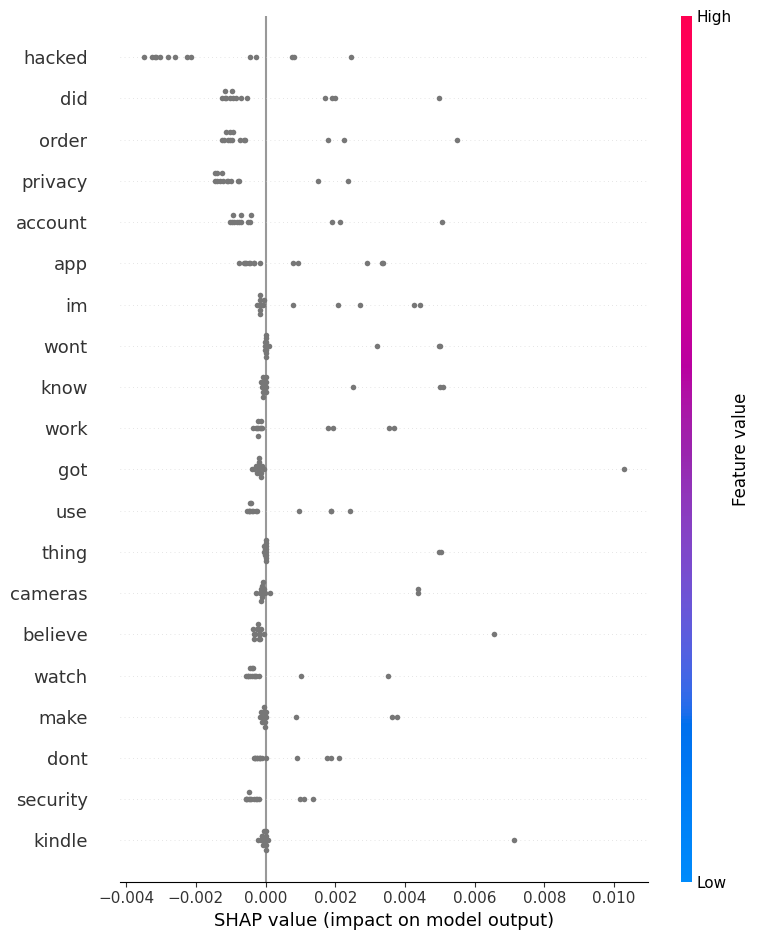

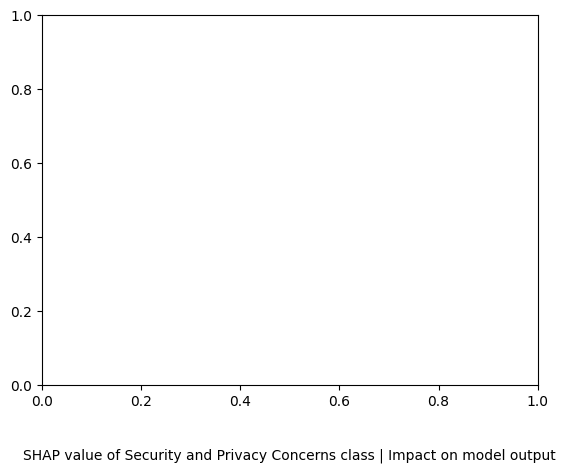

In [5]:
import pandas as pd
import numpy as np
import re
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import shap
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Load and preprocess your data
df = pd.read_csv('shape.csv', encoding='latin1')

# Preprocessing function
def clean_text(text):
    text = BeautifulSoup(text, "lxml").text
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

df['Base_Reviews'] = df['Base_Reviews'].astype(str).apply(clean_text)

# Step 2: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Base_Reviews'], df['category'], test_size=0.2, random_state=123)

# Step 3: Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 1))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 4: Train the MLP model
mlp_model = MLPClassifier(random_state=1, max_iter=300)
mlp_model.fit(X_train_tfidf, y_train)

# Step 5: Create SHAP explainer for the attacking class and compute SHAP values
class_name = 'Security and Privacy Concerns'
# Specify the class name
class_indices = np.where(y_test == class_name)[0]
explainer = shap.KernelExplainer(mlp_model.predict_proba, X_train_tfidf)  # Use sparse matrix
shap_values = explainer.shap_values(X_test_tfidf[class_indices])  # Use sparse matrix

# Step 6: Get the top impacting words/features for the attacking class
class_index = np.where(mlp_model.classes_ == class_name)[0][0]
shap_values_class = shap_values[class_index]
feature_names = vectorizer.get_feature_names_out()  # Get the feature names
top_words = np.argsort(np.abs(shap_values_class).mean(0))[-10:]  # Get the top 10 words/features
top_words_features = [feature_names[idx] for idx in top_words]

print(f"Class: {class_name}")
print(f"Top impacting words/features: {top_words_features}")

# Step 7: Plot the summary plot for the attacking class to visualize feature importance
shap.summary_plot(shap_values_class, X_test_tfidf[class_indices], feature_names=feature_names)

###### new code for bottom of the fig ####

import matplotlib.pyplot as plt

# # Step 7: Plot the summary plot for the supporting class to visualize feature importance
# shap.summary_plot(shap_values_class, X_test_tfidf[class_indices], feature_names=feature_names)

# Add the SHAP value and impact text
text = "SHAP value of Security and Privacy Concerns class | Impact on model output"
plt.text(0.5, -0.2, text, ha="center", fontsize=10, transform=plt.gca().transAxes)

# Save the plot as a PNG file
plt.savefig("Security and Privacy Concerns.png", dpi=300, bbox_inches="tight")

# Display the plot
plt.show()

